<a href="https://colab.research.google.com/github/AhmadJalal789/Projects/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Here in this project we are going to clean/Preprocess two datasets name Online news popularity and Online Shoppers Purchasing Intention, where we would remove issues like missing values if existed etc.
Then We are going to perform Exploratory data analysis of datasets then we are going to apply follwoing three models:
- K Nearest Neighbours
- Support Ventor Machines
- Decision Tree

# **1. Online News Populariy Dataset**

## Installing Necessary Libraries

In [89]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
color_pal = sns.color_palette()
plt.style.use('ggplot')
import warnings
from sklearn.preprocessing import StandardScaler

In [90]:
df1=pd.read_csv('online_news_popularity.csv')
df1.head()

# Loading of dataset by use of pandas method

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [91]:
df1.shape

# As you can see the dataset contains 39644 rows and 61 columns/features 

(39644, 61)

In [281]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# **a) Data Cleaning/ Preprocessing**

Here in this part of our analyis, we are going to clean the dataset for the convenience work of model, The question is why we need to carry out such approach?
Because when errors like missing values are present in dataset, model underfits or overfits on data which is not a desirable outcome, so to acoid such situation, cleaning is necessary

In [92]:
# Lets check for presence of Dupicated values

df1.duplicated().sum()

# As you can see the data contains  no duplicated values

0

In [93]:
# Now lets look for missing values if any

df1.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [94]:

# Now lets look for missing values if any
# To display all the columns of the dataframe along with their corresponding missing value counts, you can use the following code:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df1.isnull().sum())
    
# As you can see the data has no missig values.    
    

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

Below you can see that all the features have correct datatypes, so need to change any feature's datatype.

# **b) Exploratory Data Analysis**

Here in this part, we are going to explore the dataset, extract necesary findings for the report and presentations, so we are going to seaboarn and matplotlib libraries with "ggplot" style interface 

In [96]:
df1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [97]:
df1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [98]:
df1.describe().style.background_gradient()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

<ipython-input-279-29e2de9be4af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


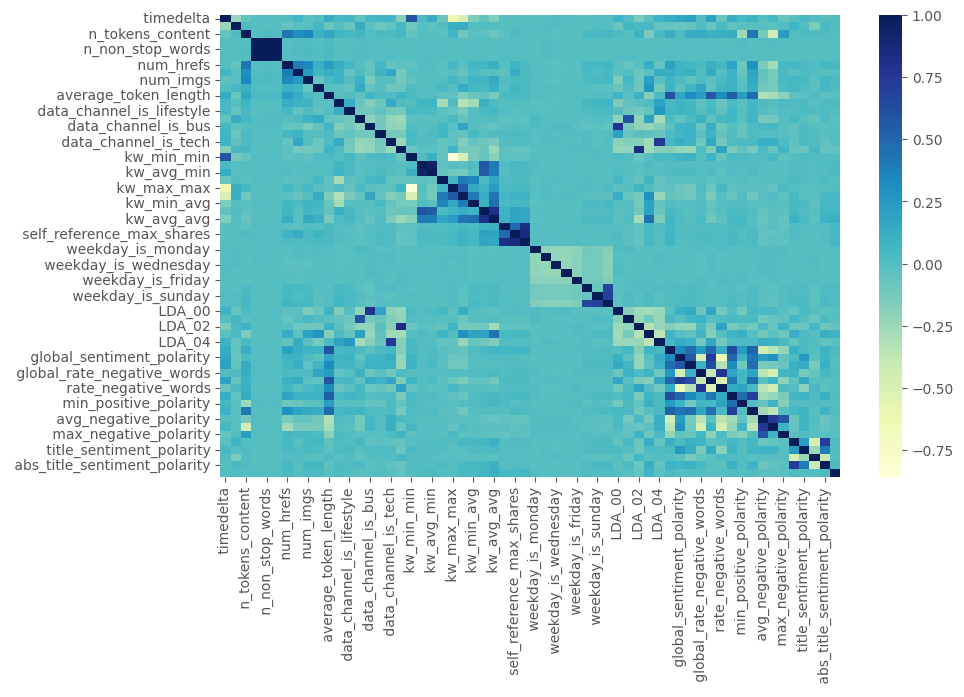

In [279]:
# To check if there is any correlation between the features, we use corr() method and integrate in heatmap
corr_matrix = df1.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='YlGnBu')
plt.show()


By the above Pearson correlation graph we can say that number of unique words and number of non-stop-words and number of non-stop-unique tokens are strongly correlated which implies that they are strongly linearly dependent on each other. Same as the above case Kw-avg- min and kw-max-min are also strongly corelated.

In [311]:
df1[' shares'].median()

1400.0

To set a threshold for deciding whether an article is popular, I choose the median number of shares in the dataset. All the articles with 1400 or more shares are marked as popular and all the articles with less than 1400 shares are considered to be unpopular.

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

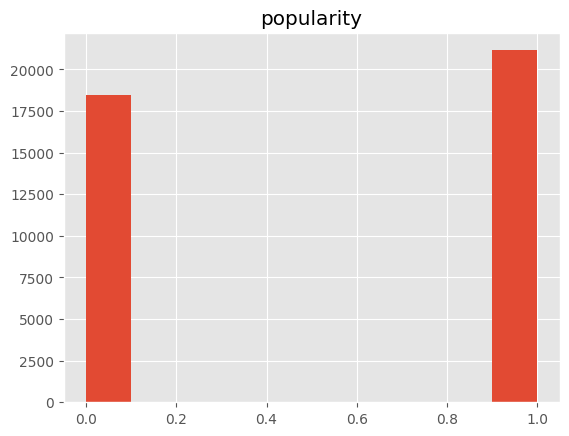

In [284]:
df1['popularity'] = df1[' shares'].apply(lambda x: 0 if x <1400 else 1)
df1.hist(column='popularity')

# So less than 1400 shares is considered 0 (assumption) and greater than 1400 is considered 1  
# We can that number of shares are higher in rate in popularity so the popularity rate of articles is higher. 

In [286]:
a,b = df1[' shares'].mean(),df1[' shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

#Below is the mean and median article shares

Mean article shares = 3395.3801836343455
Median article share = 1400.0


In [296]:
Wday1 = df1.columns.values[31:37]
Wday1   #lets collect weekdays in one variable for convenience

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday'], dtype=object)

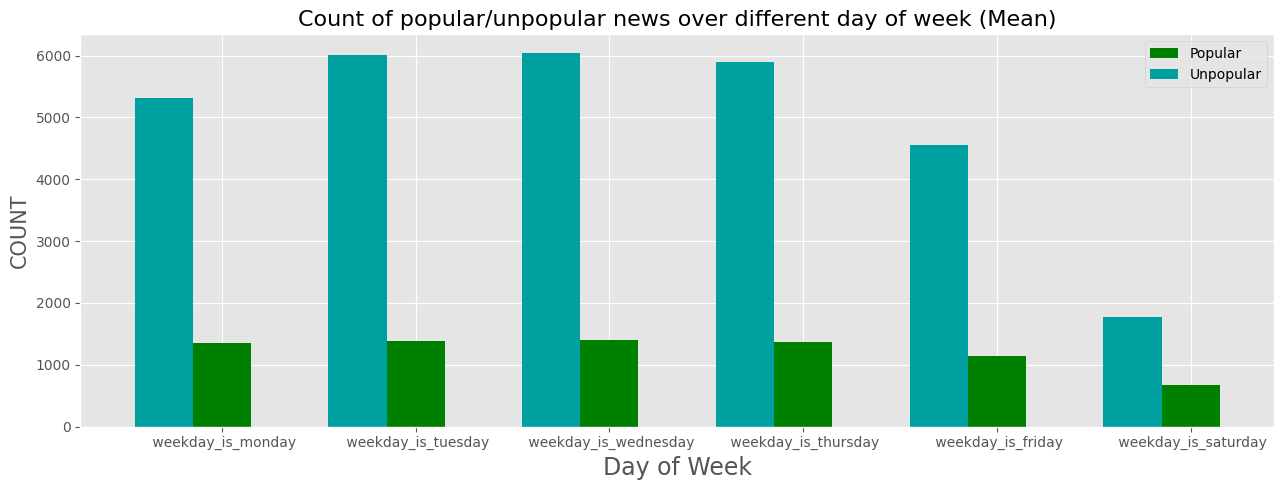

In [298]:
#based on above asssumption of popularity, below is the relationship of week days with popularity


Unpop1=df1[df1[' shares']<a]
Pop1=df1[df1[' shares']>=a]
Unpop_day = Unpop1[Wday1].sum().values
Pop_day = Pop1[Wday1].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday1)),Wday1)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)


plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


# Wednesday got the higher mean of popular articles shared
# Saturday got the lowest  mean of upopular articles shared
# Monday got the highest mean of unpopular articles shared
# Saturday got the lowest rate of unpopular articles shared

# above is the mean count of popular and unpopular articles shared on week days

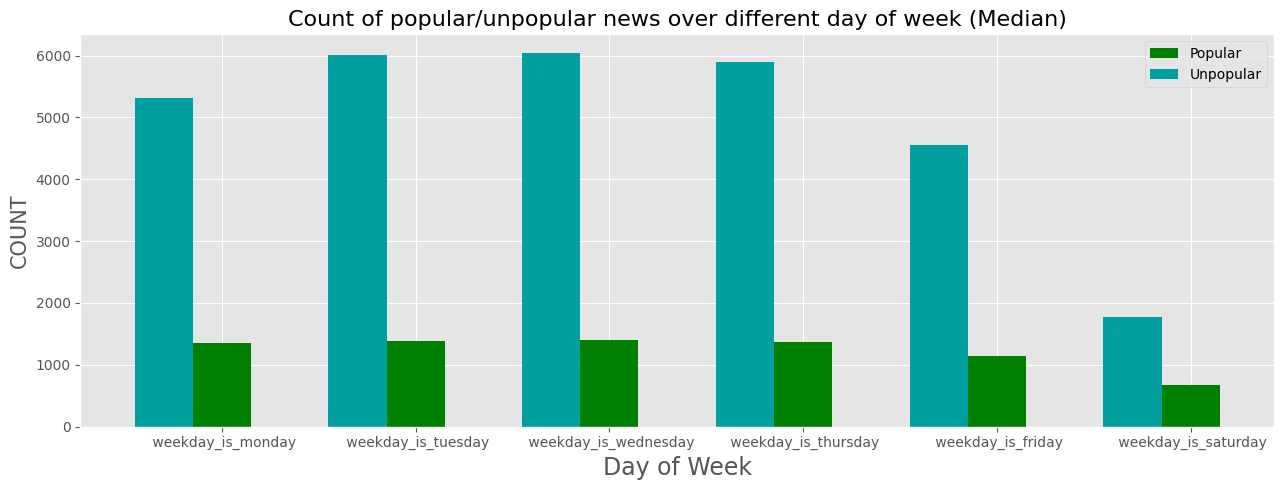

In [299]:
Unpop2=df1[df1[' shares']<b]
Pop2=df1[df1[' shares']>=b]
Unpop_day2 = Unpop2[Wday1].sum().values
Pop_day2 = Pop2[Wday1].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday1)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday1))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday1)),Wday1)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


# Wednesday got the higher median of popular articles shared
# Saturday got the lowest median of popular  articles shared
# Wednesday got the highest median of unpopular shared
# Saturday got the lowest median of unpopular shared

# above is the median count of popular and unpopular news

In [315]:
Dch=df1.columns[14:19]
Dch

Index([' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world'],
      dtype='object')

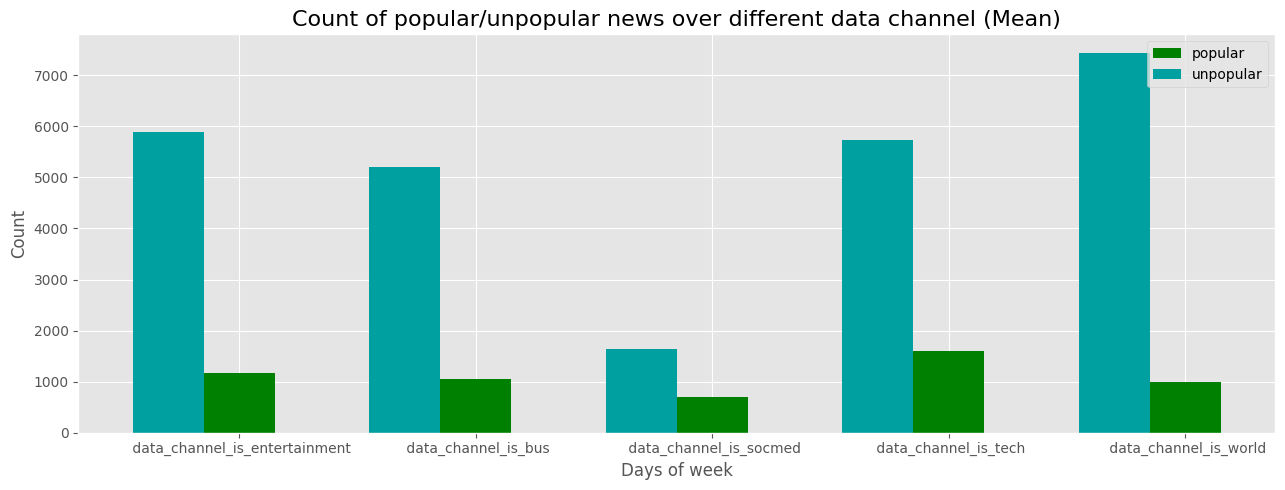

In [318]:
Up=df1[df1[' shares']<a]
Pp=df1[df1[' shares']>=a]
Up = Up[Dch].sum().values
Pp = Pp[Dch].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dch)), Pp, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dch)) - 0.3, Up, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dch)), Dch)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


# Below is the chart/plot is the count of popular and unpopular articles shared.

# Mean popular articles shared is highest on is_world channed
# Mean unpopular articles shared is highest on is_tech channel

# Mean popular articles shared is lowerst on is_socmed channed
# Mean unpopular articles shared is highest on is_socmed channel

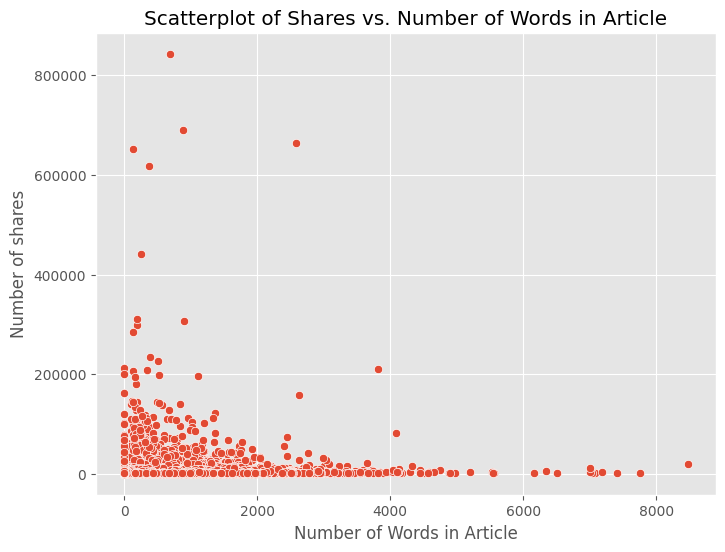

In [321]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' n_tokens_content', y=' shares', data=df1)
plt.xlabel('Number of Words in Article')
plt.ylabel('Number of shares')
plt.title('Scatterplot of Shares vs. Number of Words in Article')
plt.show()

# This shows a scatterplot showing the relationship between the number of words in the article and the number of shares

# As we can see in the draph, that number words saller than 2000 are shared more n number

# **c) Data Preparation and Modeling**

The goal is to predict the number of shares in social networks (popularity), so it is clearly a Regression Problem.
Three models as above mentioned were instructed to be used in order to analyze their performance.


## Scaling the Data
The question is why is it necessary to scale the data? The answer is that model performs better when whole data is in axis lets says form 0 to 1 value,
so when data is scaled i.e in one scale, the model is better able to generalize data and can better able to identify the patterns in order to predict the 
target value.

In [100]:
df1.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [101]:
# First we will divide the data into X and y subsets. For development we will use all features except "url", "timedelta"  features.  
#Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 target class) 

# First as given in the instruction, we will split the data into train and test subsets, having train set as 70% and test set as 30% on which we will predict

X=df1.drop(columns=['url', ' timedelta',' shares'])
y=df1[' shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# For the sacling of data we will use Standard Scaler method of Sklearn library

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [103]:
X_train

# These are the values after scaling, you can see that values are in one scale

array([[-0.66071611,  0.41196426, -0.0136059 , ...,  2.73289098,
         0.30637808,  2.83009647],
       [ 0.75121541,  0.15479927, -0.01234666, ...,  0.4837409 ,
         0.30637808,  0.19113548],
       [ 1.69250308, -0.12149369,  0.00648268, ...,  0.92675531,
        -0.61040491,  0.71093083],
       ...,
       [ 0.28057157, -0.80372477,  0.02649223, ..., -0.45340498,
         0.04099353, -0.46860477],
       [-1.60200378, -0.97800187,  0.07367493, ...,  0.67117007,
        -1.81669832,  0.4110489 ],
       [-0.19007227, -0.55293578,  0.02982828, ..., -0.2659758 ,
         0.83714718, -0.68851818]])

In [104]:
X_test

# These are the values after scaling, you can see that values are in one scale

array([[ 0.75121541,  0.98792881, -0.03165921, ..., -0.2659758 ,
         0.83714718, -0.68851818],
       [-0.66071611, -0.10024039,  0.00344311, ..., -0.2659758 ,
         0.83714718, -0.68851818],
       [-0.66071611, -0.67620495,  0.02158409, ..., -0.2659758 ,
         0.83714718, -0.68851818],
       ...,
       [-0.19007227,  1.06869137, -0.01803052, ..., -0.2659758 ,
         0.83714718, -0.68851818],
       [ 0.28057157, -0.11724303, -0.01070785, ..., -0.2659758 ,
         0.83714718, -0.68851818],
       [-0.19007227, -0.73358887,  0.01821433, ..., -0.2659758 ,
         0.5054165 , -0.68851818]])

## Building Models

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [106]:
knn_reg1 = KNeighborsRegressor()
svm_reg1 = SVR()
dt_reg1 = DecisionTreeRegressor()

In [107]:

knn_reg1.fit(X_train, y_train)
svm_reg1.fit(X_train, y_train)
dt_reg1.fit(X_train, y_train)

DecisionTreeRegressor()

In [108]:
y_pred_knn = knn_reg1.predict(X_test)
y_pred_svm = svm_reg1.predict(X_test)
y_pred_dt = dt_reg1.predict(X_test)

In [109]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_dt = mean_squared_error(y_test, y_pred_dt)

r2_knn = r2_score(y_test, y_pred_knn)
r2_svm = r2_score(y_test, y_pred_svm)
r2_dt = r2_score(y_test, y_pred_dt)

print("MSE of KNN Regressor:", mse_knn)
print("MSE of SVM Regressor:", mse_svm)
print("MSE of Decision Tree Regressor:", mse_dt)

print("R2 score of KNN Regressor:", r2_knn)
print("R2 score of SVM Regressor:", r2_svm)
print("R2 score of Decision Tree Regressor:", r2_dt)

MSE of KNN Regressor: 182839664.98158064
MSE of SVM Regressor: 176003120.02920774
MSE of Decision Tree Regressor: 366893302.51076174
R2 score of KNN Regressor: -0.06143521759089343
R2 score of SVM Regressor: -0.021747168611899514
R2 score of Decision Tree Regressor: -1.1299178841876767


In below chart the the Lowest MSE score is of SVM regressor model, so it means that it has performed better

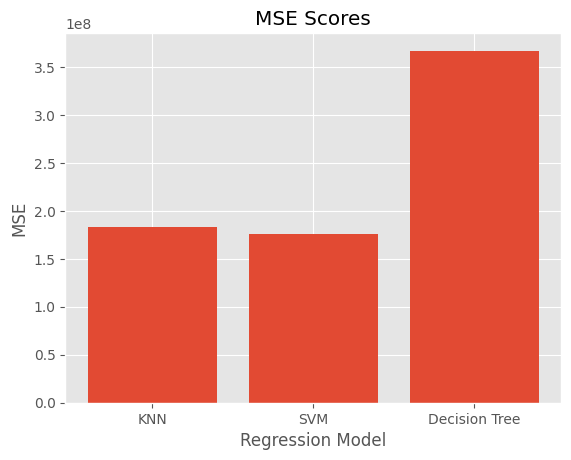

In [111]:
mse_scores1 = [mse_knn, mse_svm, mse_dt]
models1 = ['KNN', 'SVM', 'Decision Tree']
plt.bar(models1, mse_scores1)
plt.title('MSE Scores')
plt.xlabel('Regression Model')
plt.ylabel('MSE')
plt.show()

In below chart the the Highest r2 score is of SVM regressor model, so it means that it has performed better

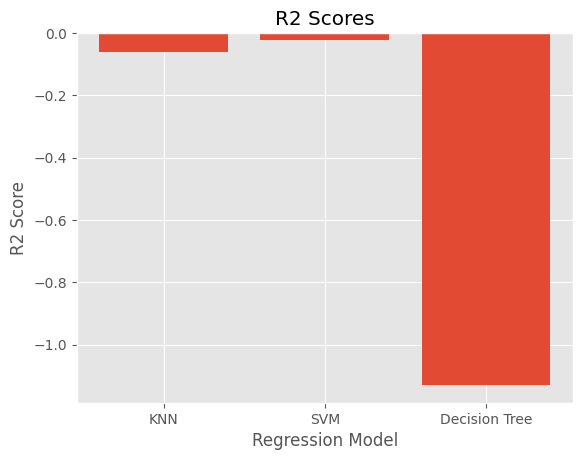

In [112]:
r2_scores1 = [r2_knn, r2_svm, r2_dt]
models1 = ['KNN', 'SVM', 'Decision Tree']
plt.bar(models1, r2_scores1)
plt.title('R2 Scores')
plt.xlabel('Regression Model')
plt.ylabel('R2 Score')
plt.show()

# **Conclusion**
The model SVM regressor has performed better than decision tree and knn model based on r2 score and lowest MSE score

# 2. Online_shoppers_intention

## Installing Necessary Libraries

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
color_pal = sns.color_palette()
plt.style.use('ggplot')
import warnings
from sklearn.preprocessing import StandardScaler

In [174]:
df2=pd.read_csv('online_shoppers_intention.csv')
df2.head()

#Loading of dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [175]:
# lets check the size of dataset

df2.shape

#So the dataset has 12330 rows and 18 columns/features

(12330, 18)

In [176]:
#lets check the datatypes of features

df2.info()

# Only four features are categorical and others are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# a) Data Cleaning/ Preprocessing
Here in this part of our analyis, we are going to clean the dataset for the convenience work of model, The question is why we need to carry out such approach? Because when errors like missing values are present in dataset, model underfits or overfits on data which is not a desirable outcome,
so to avoid such situation, cleaning is necessary.

### Duplicated Values

In [177]:
# lets check for duplicated values

df2.duplicated().sum()

# We can see there are 125 duplicated values that are need to be removed otherewise it will cuse problems for models

125

In [178]:
# Here we will remove duplicated values using drop_duplicate() method

df2.drop_duplicates(inplace=True)

In [179]:
# lets confirm the absence of duplicated values

df2.duplicated().sum()

# As we can see there are no duplicated values

0

### Missing Values

In [180]:
# Lets check for miising values

df2.isnull().sum() *100

# We can see that features donot have any missing valeus which is our requirement

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Datatypes

There are ome columns that are not be change into int datatype because models only work on numerical data.

In [181]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [182]:
df3=df2.copy()

In [183]:
df2['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [184]:
df3=df2.copy()

In [185]:
# For labeling of target feature "Revenue", we will use Label Encode module of sklearn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Revenue'] = le.fit_transform(df2['Revenue'])

In [186]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [187]:
df2.isnull().sum() *100

#no missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [188]:
df2['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

In [189]:
# For labeling of weekend feature, we will also use label encoder module


le = LabelEncoder()
df2['Weekend'] = le.fit_transform(df2['Weekend'])

In [190]:
df2.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0


Below part shows the significance of one-ht encoding, which is used to encode categorical columns inro numerical numbers.
So we used get_ummies method to get values in the form of 0 and 1.

In [191]:

df2['Month'].value_counts()  # checking counts of values

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [192]:
dw=pd.get_dummies(df2['Month'],drop_first=True)

# one-hot encoding of month feature 

In [193]:
dy=pd.get_dummies(df2['VisitorType'],drop_first=True)

# one-hot encoding of visitortype feature 

In [194]:
df2=pd.concat([df2,dw,dy],axis=1)

#Here we have concated the dataframes 

In [195]:
df2.drop(columns=['Month','VisitorType'],inplace=True)

#after encoding of categorical feature, we have dropped them

In [196]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


# b) Exploratory Data Analysis

In [210]:
# Checking the shape of the dataframe
df3.shape

#the dataset contains 12205 rows and 18 columns/features

(12205, 18)

In [212]:
# lets check the data types and missing values
df3.info()


# Only two features Month adn Visitor appears to be catogorical features, so others are numerical either int or float datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [214]:
# lets check the summary statistics of the numerical columns
df3.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [251]:
summary12 = df3.describe()
mins = summary12.loc['min']
maxs = summary.loc['max']


print("Minimum values:")
print(mins)
print()
print("Maximum values:")
print(maxs)


# We can see the maximum and minimum values of numerical features

Minimum values:
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
OperatingSystems           1.0
Browser                    1.0
Region                     1.0
TrafficType                1.0
Revenue                    0.0
Name: min, dtype: float64

Maximum values:
Administrative                27.000000
Administrative_Duration     3398.750000
Informational                 24.000000
Informational_Duration      2549.375000
ProductRelated               705.000000
ProductRelated_Duration    63973.522230
BounceRates                    0.200000
ExitRates                      0.200000
PageValues                   361.763742
SpecialDay                     1.000000
OperatingSystems               8.000000
Browser                       13.000

In [221]:
mean_ProductRelated_Duration_pages = df3['ProductRelated_Duration'].mean()
mean_Informational_Duration_pages = df3['Informational_Duration'].mean()
mean_Administrative_Duration_pages = df3['Administrative_Duration'].mean()

print("Mean of 'ProductRelated_Duration_pages':", mean_ProductRelated_Duration)
print("Mean of 'Informational_Duration_pages':", mean_Informational_Duration)
print("Mean of 'Administrative_Duration_pages':", mean_Administrative_Duration)

#We can see that mean time spent on informational_pages is the lowest and of Product Related pages is highest

Mean of 'ProductRelated_Duration_pages': 1206.9824573712112
Mean of 'Informational_Duration_pages': 34.82545403103851
Mean of 'Administrative_Duration_pages': 81.64633084391741


In [224]:
df3['Revenue'] = df3['Revenue'].astype(int)

In [230]:
df3['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

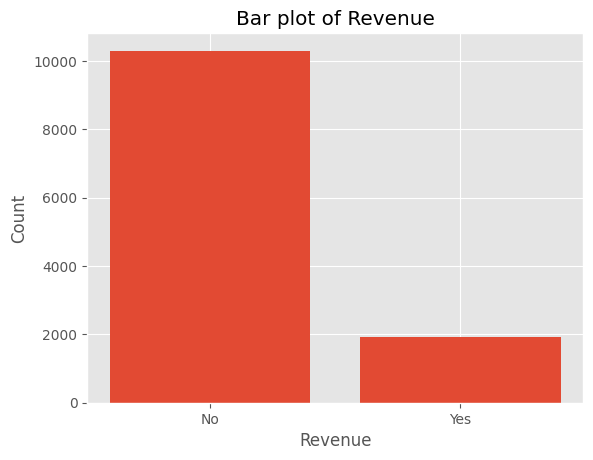

In [232]:
revenue_counts = df3['Revenue'].value_counts()
plt.bar(revenue_counts.index, revenue_counts.values)
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Bar plot of Revenue')
plt.show()

# We can conclude by observing below in plot that less number of users  ended up buying something from the portal and more in number did not buy from the portal

In [234]:
df3['PageValues'].value_counts()

#The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 


0.000000     9475
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

In [236]:
gp = df3.groupby('Revenue')['PageValues'].mean()

print(grouped)

Revenue
0     1.999985
1    27.264518
Name: PageValues, dtype: float64


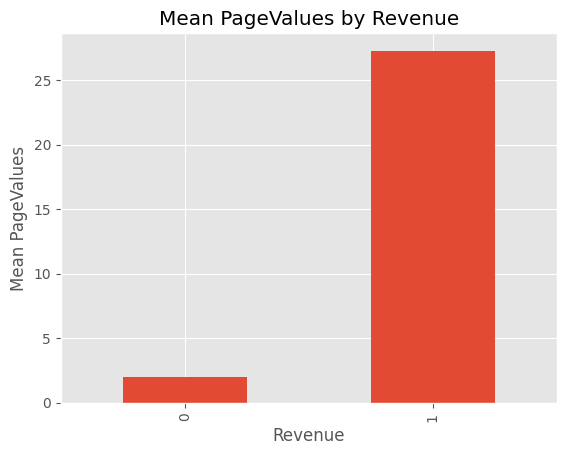

In [237]:
gp.plot(kind='bar')
plt.xlabel('Revenue')
plt.ylabel('Mean PageValues')
plt.title('Mean PageValues by Revenue')
plt.show()

# We can see that the mean PageValues is much higher for those having bought something as compared to those who not bought

<ipython-input-240-94d66eb1cbfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df3.corr())


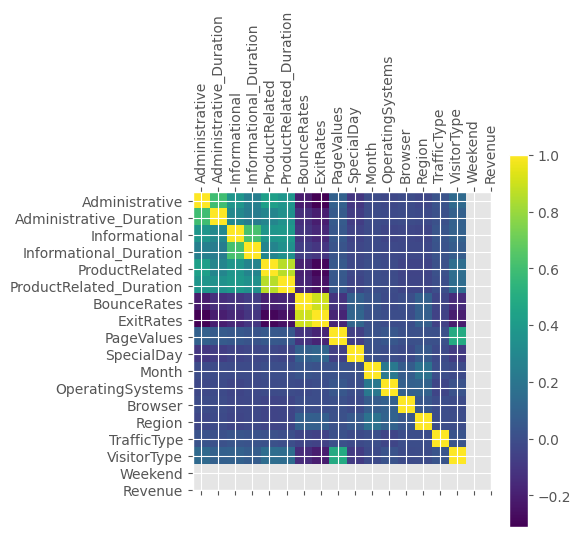

In [240]:
plt.matshow(df3.corr())
plt.xticks(range(df3.shape[1]), df3.columns, rotation=90)
plt.yticks(range(df3.shape[1]), df3.columns)
plt.colorbar()
plt.show()


# As we can see highest  correlation is see in between people who visited administrative, inforamtional and product relaed pages with time spent on those pages

In [243]:
gp2 = df3.groupby('Revenue')['Administrative_Duration'].mean()

print(grouped)

Revenue
0     1.999985
1    27.264518
Name: PageValues, dtype: float64


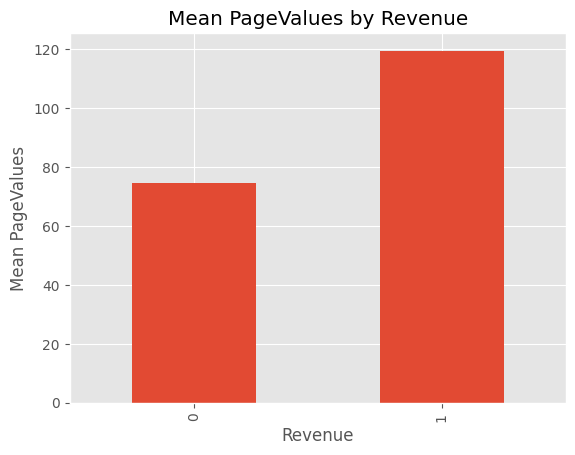

In [244]:
gp2.plot(kind='bar')
plt.xlabel('Revenue')
plt.ylabel('Mean PageValues')
plt.title('Mean PageValues by Revenue')
plt.show()

# Those who ahve visited administrative pages have "bought something from the portal" in highest number as compare to who have not bought

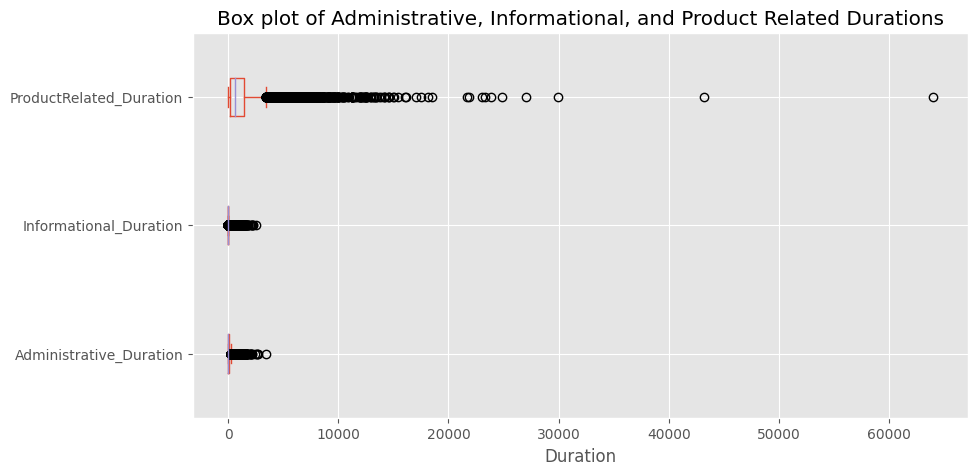

In [250]:
cp = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Create a boxplot of the columns
df3[cp].plot(kind='box', vert=False, figsize=(10, 5))

# Add labels and title
plt.xlabel('Duration')
plt.title('Box plot of Administrative, Informational, and Product Related Durations')

# Show the plot
plt.show()


# You can see there are alot of outliers



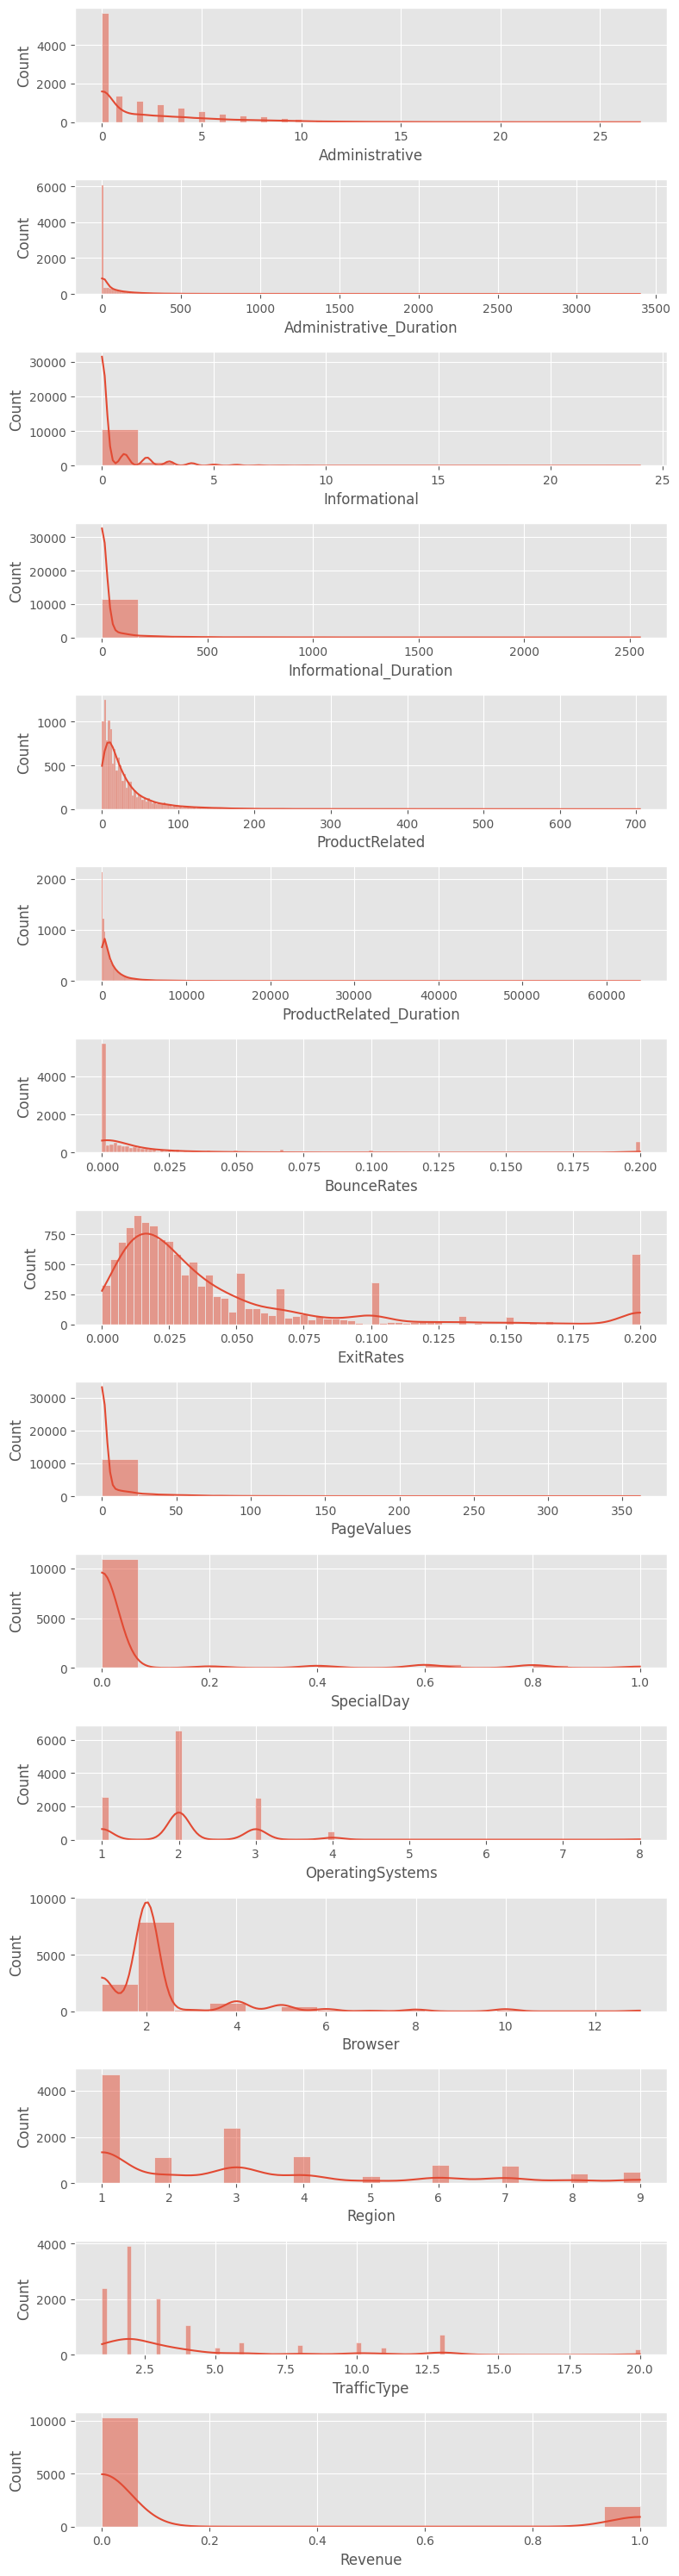

In [249]:
nc= df3.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution of each numerical column
fig, axs = plt.subplots(nrows=len(nc), figsize=(8, 30))
for i, col in enumerate(nc):
    sns.histplot(data=df3, x=col, kde=True, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


# You can see in the below kde plots that none of the features are nomally distributed. Normal distribution of features are necessary for the..
# good generalization and performance of models so for this purpose, data will be scaled later ahead.

# c) Data Preparation / Modeling

### Goal/Objective is  to predict which user will end up buying something from the portal, so it is clearly a Classification Problem. Three models as above mentioned were instructed to be used in order to analyze their performance.



## Scaling the Data
The question is why is it necessary to scale the data? The answer is that model performs better when whole data is in axis lets says form 0 to 1 value, so when data is scaled i.e in one scale, the model is better able to generalize data and can better able to identify the patterns in order to predict the target value.

In [197]:
X=df2.drop(columns=['Revenue'])
y=df2['Revenue']

In [198]:
# First as given in the instruction, we will split the data into train and test subsets, having train set as 70% and test set as 30% on which we will predict.

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [199]:
# Using of standard scaler module
sc1 = StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.transform(X_test1)

In [200]:
from sklearn.svm import SVC

### Building of models

In [201]:
knn1 = KNeighborsClassifier()
svm1 = SVC()
dtc1 = DecisionTreeClassifier()

Here we fit three models below mentioned and find accuracy score of all the models and had printed them

## Modeling on Test subset
We will use the models to predict on test subsets

In [202]:
#fitting model

knn1.fit(X_train1, y_train1)
svm1.fit(X_train1, y_train1)
dtc1.fit(X_train1, y_train1)

#Taking prediction

y_pred_knn = knn1.predict(X_test1)
y_pred_svm = svm1.predict(X_test1)
y_pred_dtc = dtc1.predict(X_test1)

#finding accuracy of test set

acc_knn = accuracy_score(y_test1, y_pred_knn)
acc_svm = accuracy_score(y_test1, y_pred_svm)
acc_dtc = accuracy_score(y_test1, y_pred_dtc)

#printing accuracy
print("Accuracy of KNN:", acc_knn)
print("Accuracy of SVM:", acc_svm)
print("Accuracy of Decision Tree:", acc_dtc)

#We can clearly see that Support vector machine classifier has performed better than other with the simplest of hyperparimeter

Accuracy of KNN: 0.8776624795193884
Accuracy of SVM: 0.8937738940469688
Accuracy of Decision Tree: 0.8604587657018022


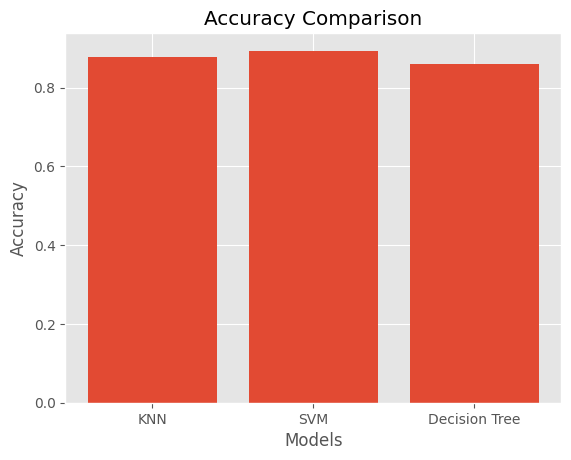

In [203]:
models_set = ["KNN", "SVM", "Decision Tree"]
accuracies_of_models = [acc_knn, acc_svm, acc_dtc]

plt.bar(models_set, accuracies_of_models)
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


# Here we have plotted the accuracies of model and we can clearly see SVM performs better

## Modeling on Training subset

Here we will use the models to predict on training subst to make sure that models are not
underfitting and overfitting

In [204]:
y_pred_knn = knn1.predict(X_train1)
y_pred_svm = svm1.predict(X_train1)
y_pred_dtc = dtc1.predict(X_train1)

#finding accuracy of training set

acc_knn1 = accuracy_score(y_train1, y_pred_knn)
acc_svm1 = accuracy_score(y_train1, y_pred_svm)
acc_dtc1 = accuracy_score(y_train1, y_pred_dtc)

#printing accuracy
print("Accuracy of KNN:", acc_knn)
print("Accuracy of SVM:", acc_svm)
print("Accuracy of Decision Tree:", acc_dtc)


Accuracy of KNN: 0.8776624795193884
Accuracy of SVM: 0.8937738940469688
Accuracy of Decision Tree: 0.8604587657018022


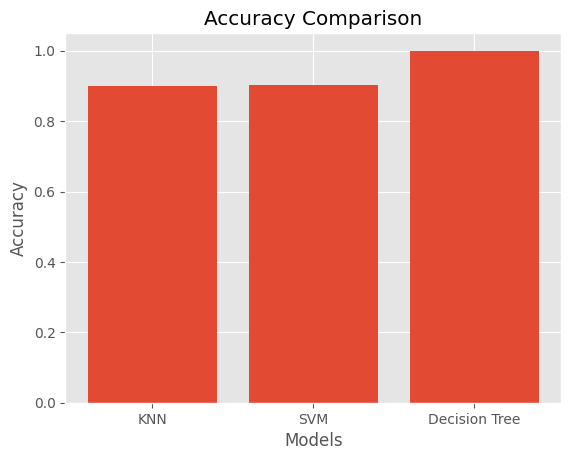

In [205]:
models_set = ["KNN", "SVM", "Decision Tree"]
accuracies_of_models = [acc_knn1, acc_svm1, acc_dtc1]

plt.bar(models_set, accuracies_of_models)
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


# Here we have plotted the accuracies of model and we can clearly see SVM performs better

# Conclusion

The comparison on accuracies of models on training and test subsets indicates that Decision tree
model is underfitting but other two models are performing very good, they are neither under fitting
nor over fitting.

Here, in the prediction of whether "user will end up buying something from the portal", among the three
models SVM, Decision tree and K nearest neighbours, SVM has performed better so SVM is the winner based 
on accuracy metrics